# Assignment 3: Analysis of labour market characteristics of Hungary between 2009-2020
by Nikoletta Jablonczay

In [623]:
import os
import zipfile
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Image
from IPython.core.interactiveshell import InteractiveShell

%matplotlib inline

#### Data Loading

In [1105]:
from pathlib import Path
work_dir = Path.cwd()
print(work_dir)

C:\Users\N\Documents\2021WS\Python\data


## Analysing Regional Data between 2009-2020

In [648]:
!head regionaldata.csv

ď»żUnit_name,Unit_type,Year,Employment_rate,Unemployment_rate,Activity_Rate,Temporary_in_migrants,Temporary_out_migrants,Temporary_migraton_difference,Temporary_internal_migrants,Permanent_in_migrants,Permanent_out_migrants,Permanent_migration_difference,Permanent_internal_migrants,Vacancies,Rate_of_vacancies,"Economically_active,_thousand_persons","Economically_inactive,_thousand_persons",Population_aged_15â€“74_thousand_persons,Of_which_Potential_labour_reserve_thousand_persons,
Budapest,capital and region,2009,58.2,5.8,61.8,28182.00,17541.00,10641.00,NaN,27476.00,27436.00,40.00,NaN,9782.00,1.1,813.2,502.6,1315.8,76.2,
Pest,county and region,2009,55.1,6.8,59.2,21347.00,19997.00,1350.00,6976.00,40009.00,28759.00,11250.00,12866.00,1985.00,0.8,541.7,373.4,915.0,58.4,
Central Hungary,large region,2009,57.0,6.2,60.7,49529.00,37538.00,11991.00,6976.00,67485.00,56195.00,11290.00,12866.00,11766.00,1.0,1354.9,875.9,2230.8,134.6,
Fejer,county,2009,52.8,8.7,57.9,8032.00,8137.00,-105.00,3763.00,

In [649]:
dfregional = pd.read_csv('regionaldata.csv')
print(type(df_regional))

<class 'pandas.core.frame.DataFrame'>


dfregional.head()

In [651]:
dfregional.shape

(360, 21)

In [652]:
dfregional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 21 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Unit_name                                           360 non-null    object 
 1   Unit_type                                           360 non-null    object 
 2   Year                                                360 non-null    int64  
 3   Employment_rate                                     360 non-null    float64
 4   Unemployment_rate                                   360 non-null    float64
 5   Activity_Rate                                       360 non-null    float64
 6   Temporary_in_migrants                               360 non-null    float64
 7   Temporary_out_migrants                              360 non-null    float64
 8   Temporary_migraton_difference                       348 non-null    float64
 9  

In [647]:
dfregional.describe()

,Year,Employment_rate,Unemployment_rate,Activity Rate,Temporary in-migrants,Temporary out-migrants,Temporary migration difference,Temporary internal migrants,Permanent in-migrants,Permanent out-migrants,Permanent migration difference,Permanent internal migrants,Vacancies,Rate_of_vacancies,"Economically active, thousand persons","Economically inactive, thousand persons","Population aged 15–74, thousand persons","Of which: Potential labour reserve, thousand persons",Unnamed: 20
count,360.00,360.00,360.00,360.00,360.00,360.00,348.00,348.00,360.00,360.00,348.00,348.00,360.00,360.00,360.00,360.00,360.00,360.00,0.00
mean,2014.50,55.42,7.51,59.76,33107.35,33268.84,-167.06,15329.01,28504.11,28796.86,-302.84,15733.49,5501.05,1.47,562.11,368.67,930.78,69.67,NaN
std,3.46,6.10,3.95,4.36,50696.73,50734.50,2352.07,22591.88,43865.68,43828.68,3622.01,23035.80,10607.52,0.61,857.06,557.91,1409.40,113.71,NaN
min,2009.00,40.50,1.10,49.10,3039.00,3901.00,-10535.00,1688.00,3616.00,4147.00,-12449.00,2285.00,195.00,0.50,77.40,52.00,143.50,4.00,NaN
25%,2011.75,51.15,4.20,56.48,9659.00,9833.25,-869.50,4880.25,7960.75,8189.50,-1264.75,4697.25,979.50,1.00,154.07,106.30,260.85,17.68,NaN
50%,2014.50,55.90,7.25,60.00,14749.00,14601.50,-291.50,7233.00,11629.00,12453.50,-459.00,7352.00,1928.62,1.30,237.95,153.85,402.80,31.25,NaN
75%,2017.25,60.10,10.10,63.23,35495.75,35654.00,265.00,15896.75,28150.50,28768.00,214.25,16862.00,4470.25,1.90,553.67,368.93,937.67,71.83,NaN
max,2020.00,67.20,18.00,69.40,307025.00,307025.00,12863.00,130332.00,283096.00,283096.00,14939.00,144204.00,83510.00,3.60,4803.50,3364.30,7676.20,790.30,NaN


Numerical analysis and visualization

In [585]:
dfregional['Employment_rate'].mean()

13791.433333333332

In [654]:
dfregional['Employment_rate'].median()

55.9

<AxesSubplot:>

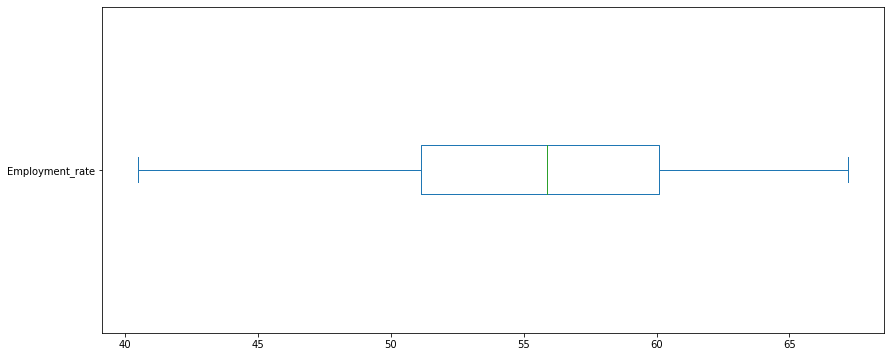

In [656]:
dfregional['Employment_rate'].plot(kind='box', vert=False, figsize=(14,6))

<AxesSubplot:ylabel='Density'>

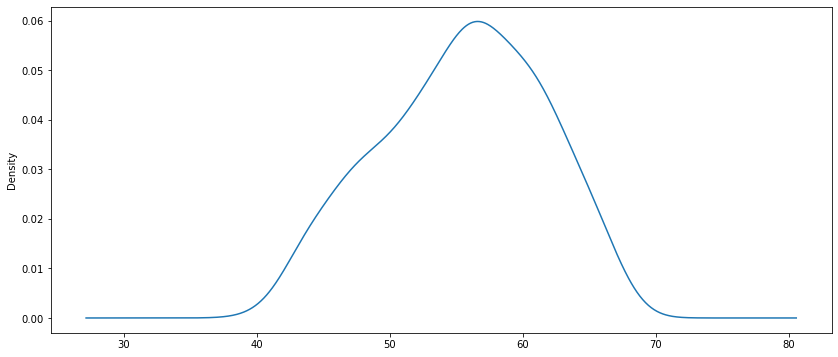

In [658]:
dfregional['Employment_rate'].plot(kind='density', figsize=(14,6)) 

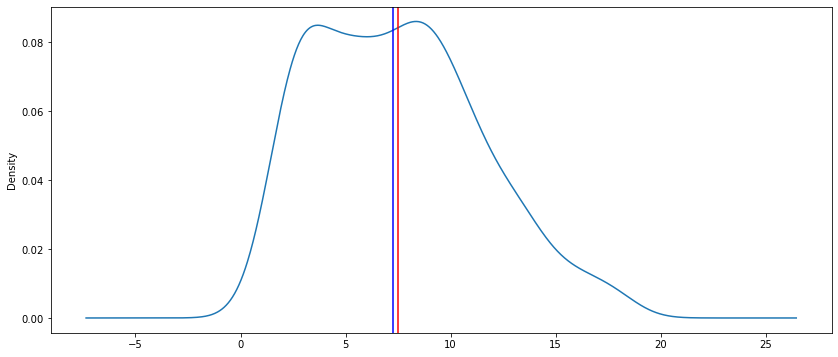

In [662]:
ax = dfregional['Unemployment_rate'].plot(kind='density', figsize=(14,6))
ax.axvline(dfregional['Unemployment_rate'].mean(), color='red')
ax.axvline(dfregional['Unemployment_rate'].median(), color='blue')

Text(0.5, 0, 'Permanent_out_migration')

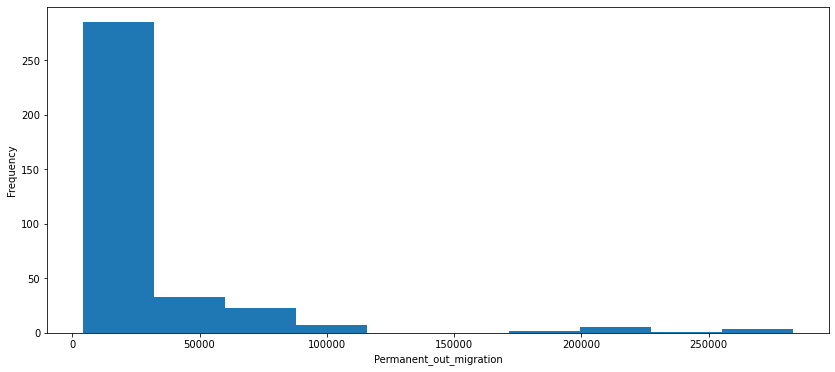

In [664]:
ax = dfregional['Permanent_out_migrants'].plot(kind='hist', figsize=(14,6))
ax.set_xlabel('Permanent_out_migration')

Categorical analysis and visualization

In [719]:
corr_regional = dfregional.corr()

corr_regional

,Employment_rate,Unemployment_rate,Activity_Rate,Temporary_in_migrants,Temporary_out_migrants,Temporary_migraton_difference,Temporary_internal_migrants,Permanent_in_migrants,Permanent_out_migrants,Permanent_migration_difference,Permanent_internal_migrants,Vacancies,Rate_of_vacancies,"Economically_active,_thousand_persons","Economically_inactive,_thousand_persons",Population_aged_15–74_thousand_persons,Of_which_Potential_labour_reserve_thousand_persons,Unnamed: 20
Employment_rate,1.00,-0.93,0.98,0.14,0.12,0.37,0.08,0.15,0.12,0.32,0.10,0.31,0.75,0.11,0.00,0.07,-0.16,NaN
Unemployment_rate,-0.93,1.00,-0.84,-0.09,-0.07,-0.34,-0.05,-0.11,-0.08,-0.30,-0.07,-0.23,-0.72,-0.05,0.04,-0.02,0.20,NaN
Activity_Rate,0.98,-0.84,1.00,0.16,0.14,0.38,0.10,0.17,0.14,0.31,0.11,0.33,0.71,0.14,0.03,0.09,-0.12,NaN
Temporary_in_migrants,0.14,-0.09,0.16,1.00,1.00,-0.01,0.98,0.98,0.98,-0.05,0.97,0.87,0.14,0.98,0.95,0.98,0.85,NaN
Temporary_out_migrants,0.12,-0.07,0.14,1.00,1.00,-0.10,0.98,0.98,0.98,-0.12,0.97,0.86,0.13,0.98,0.95,0.98,0.86,NaN
Temporary_migraton_difference,0.37,-0.34,0.38,-0.01,-0.10,1.00,-0.28,0.02,-0.09,0.69,-0.27,0.24,0.18,0.02,-0.12,-0.04,-0.27,NaN
Temporary_internal_migrants,0.08,-0.05,0.10,0.98,0.98,-0.28,1.00,0.95,0.96,-0.34,0.98,0.82,0.11,0.95,0.94,0.95,0.85,NaN
Permanent_in_migrants,0.15,-0.11,0.17,0.98,0.98,0.02,0.95,1.00,1.00,0.08,0.97,0.89,0.16,0.99,0.95,0.98,0.83,NaN
Permanent_out_migrants,0.12,-0.08,0.14,0.98,0.98,-0.09,0.96,1.00,1.00,-0.09,0.98,0.88,0.15,0.99,0.96,0.98,0.84,NaN
Permanent_migration_difference,0.32,-0.30,0.31,-0.05,-0.12,0.69,-0.34,0.08,-0.09,1.00,-0.28,0.18,0.20,-0.03,-0.14,-0.07,-0.29,NaN


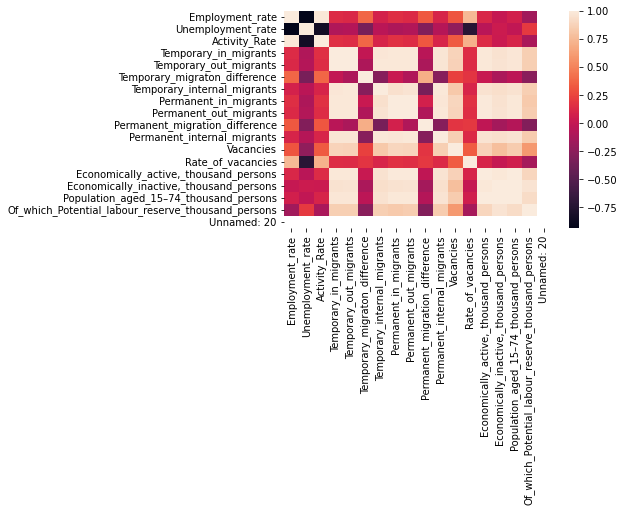

In [756]:
sns.heatmap(corr_regional);

<AxesSubplot:xlabel='Vacancies', ylabel='Unemployment_rate'>

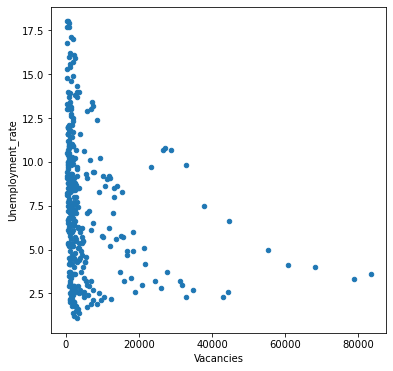

In [721]:
dfregional.plot(kind='scatter', x='Vacancies', y='Unemployment_rate', figsize=(6,6))

<AxesSubplot:xlabel='Vacancies', ylabel='Activity_Rate'>

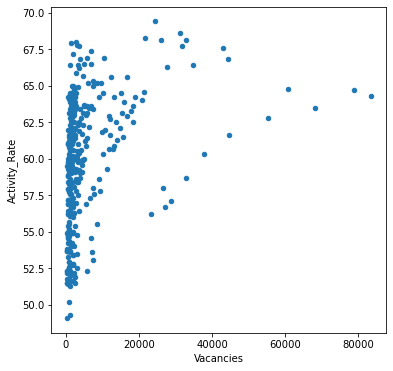

In [722]:
dfregional.plot(kind='scatter', x='Vacancies', y='Activity_Rate', figsize=(6,6))

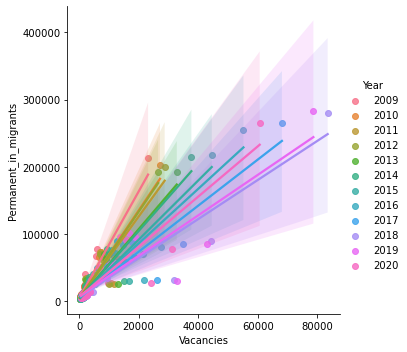

In [755]:
sns.lmplot(x="Vacancies", y="Permanent_in_migrants", hue="Year", data=dfregional);

In [723]:
dflabourdata = pd.read_csv('labourdata.csv')

In [735]:
corr_dflabourdata = dflabourdata.corr()

corr_dflabourdata

,Year,Unemployed_Persons,Employed_Persons,Unemployment_Rate,Employment_Rate
Year,1.00,-0.56,0.10,-0.33,0.14
Unemployed_Persons,-0.56,1.00,0.38,0.02,0.35
Employed_Persons,0.10,0.38,1.00,-0.67,0.98
Unemployment_Rate,-0.33,0.02,-0.67,1.00,-0.70
Employment_Rate,0.14,0.35,0.98,-0.70,1.00


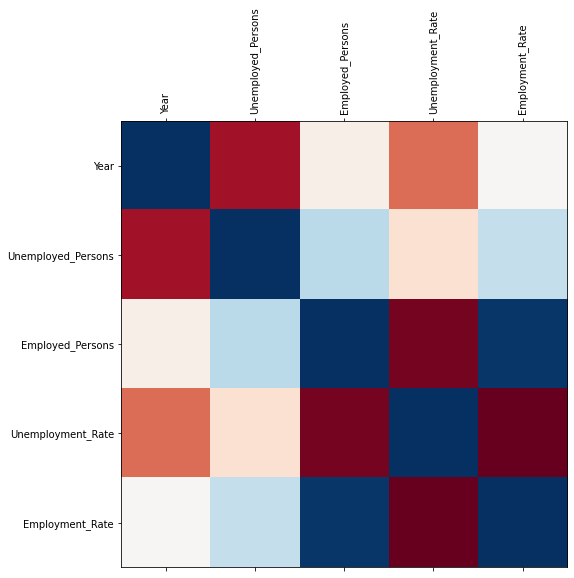

In [725]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr_dflabourdata, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr_dflabourdata.columns)), corr_dflabourdata.columns, rotation='vertical');
plt.yticks(range(len(corr_dflabourdata.columns)), corr_dflabourdata.columns);

Text(0, 0.5, 'Unemplyoment Rate')

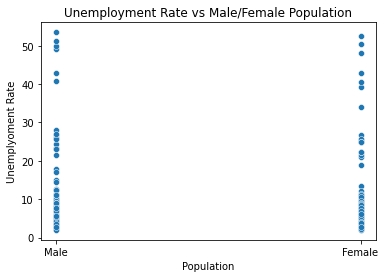

In [726]:
ax = sns.scatterplot(x="Population", y="Unemployment_Rate", data=dflabourdata)
ax.set_title("Unemployment Rate vs Male/Female Population")
ax.set_xlabel("Population")
ax.set_ylabel("Unemplyoment Rate")

Text(0, 0.5, 'Number of Unemployed People')

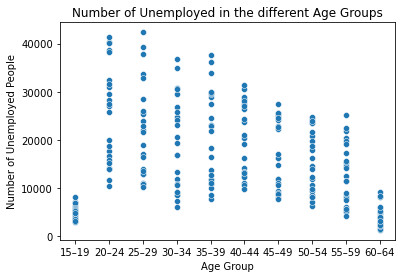

In [727]:
ax1 = sns.scatterplot(x="Age_Group", y="Unemployed_Persons", data=dflabourdata)
ax1.set_title("Number of Unemployed in the different Age Groups")
ax1.set_xlabel("Age Group")
ax1.set_ylabel("Number of Unemployed People")

In [1099]:
dfreglim = pd.read_csv('regional_data_2018-2020.csv')

In [1094]:
dfreglim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 37 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   Year                                                                                        60 non-null     int64  
 1   Name                                                                                        60 non-null     object 
 2   Unit                                                                                        60 non-null     object 
 3   No                                                                                          60 non-null     int64  
 4   Regional_unit                                                                               60 non-null     object 
 5   Male Population                              

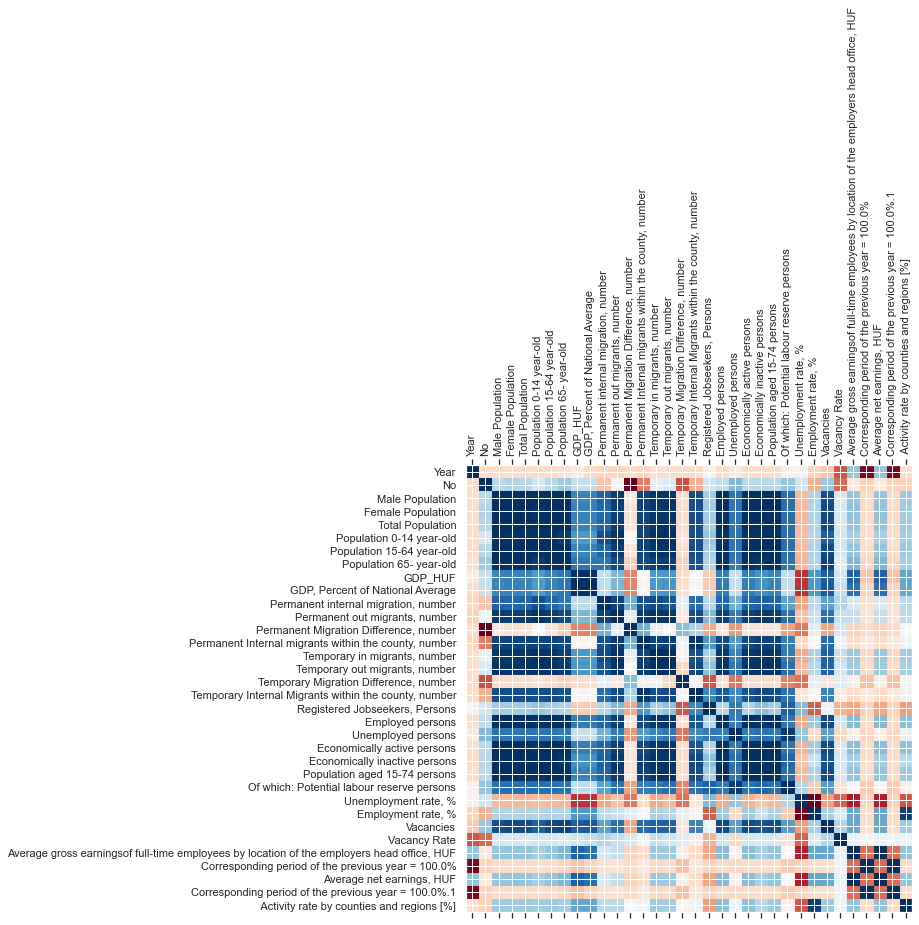

In [1095]:
corr_dfreglim = dfreglim.corr()

fig = plt.figure(figsize=(8,8))
plt.matshow(corr_dfreglim, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr_dfreglim.columns)), corr_dfreglim.columns, rotation='vertical');
plt.yticks(range(len(corr_dfreglim.columns)), corr_dfreglim.columns);

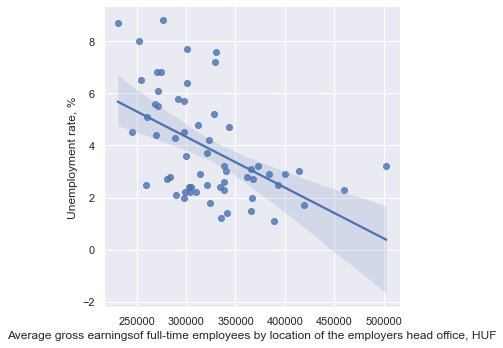

In [1096]:
sns.lmplot(x="Average gross earningsof full-time employees by location of the employers head office, HUF", y="Unemployment rate, %", data=dfreglim);

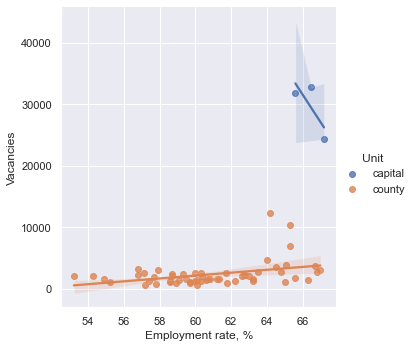

In [1097]:
sns.lmplot(x="Employment rate, %", y="Vacancies", hue="Unit", data=dfreglim);

Text(0, 0.5, 'Average net earnings, HUF')

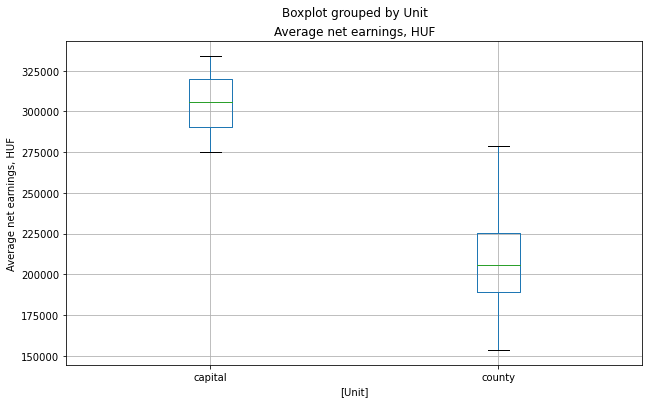

In [901]:
jobseekers = dfreglim[['Unit', 'Average net earnings, HUF']].boxplot(by='Unit', figsize=(10,6))
jobseekers.set_ylabel('Average net earnings, HUF')

Registered Jobseekers, Persons       AxesSubplot(0.125,0.536818;0.227941x0.343182)
Employed persons                  AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Unemployed persons                AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Economically active persons             AxesSubplot(0.125,0.125;0.227941x0.343182)
Economically inactive persons        AxesSubplot(0.398529,0.125;0.227941x0.343182)
dtype: object

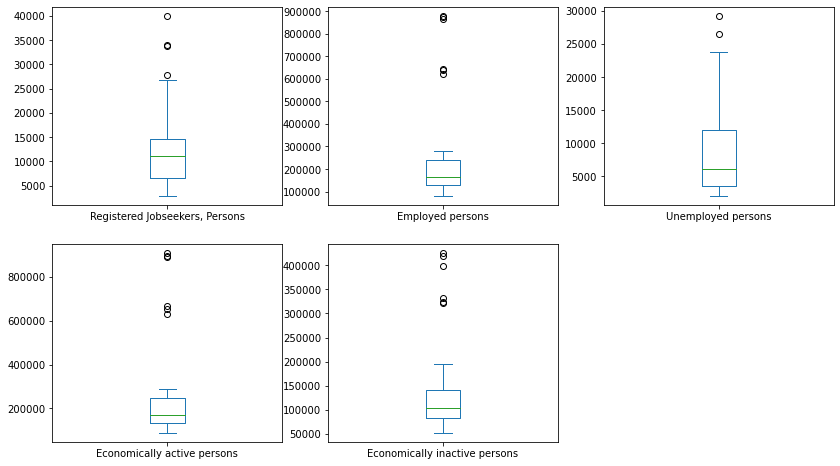

In [902]:
boxplot_cols = ['Registered Jobseekers, Persons', 'Employed persons', 'Unemployed persons', 'Economically active persons', 'Economically inactive persons']

dfreglim[boxplot_cols].plot(kind="box", subplots=True, layout=(2,3), figsize=(14,8))

Labour Market Overview

In [890]:
dflabourdata = pd.read_csv('labourdata.csv')

In [818]:
type(dflabourdata)

pandas.core.frame.DataFrame

In [819]:
dflabourdata.head()

,Year,Population,Age_Group,Unemployed_Persons,Employed_Persons,Economically_active,Economically_inactive
0,2009,Male,15–19,7027.90,7257.60,14285.46,284426.64
1,2010,Male,15–19,6312.20,6369.80,156155.08,159412.95
2,2011,Male,15–19,5229.80,6934.00,299964.89,45822.02
3,2012,Male,15–19,7090.80,6156.80,362779.04,25605.89
4,2013,Male,15–19,8234.10,7823.90,349958.15,31025.98


In [820]:
dflabourdata.tail()

,Year,Population,Age_Group,Unemployed_Persons,Employed_Persons,Economically_active,Economically_inactive
283,2016,Female,70–74,NaN,3647.50,291565.00,45173.00
284,2017,Female,70–74,NaN,6072.30,212509.00,81004.00
285,2018,Female,70–74,NaN,8381.40,109363.00,233404.00
286,2019,Female,70–74,NaN,8344.20,30187.00,336634.00
287,2020,Female,70–74,NaN,8977.00,9146.00,278943.00


In [821]:
dflabourdata.describe()

,Year,Unemployed_Persons,Employed_Persons,Economically_active,Economically_inactive
count,288.00,240.00,288.00,288.00,288.00
mean,2014.50,16090.85,177436.41,190873.24,123615.34
std,3.46,10005.71,120577.66,127262.20,96485.64
min,2009.00,1296.90,1884.80,1913.37,12363.50
25%,2011.75,8094.35,32992.45,34399.05,42887.74
50%,2014.50,13891.15,217373.50,234291.48,72997.33
75%,2017.25,24020.08,275789.50,293456.23,218019.06
max,2020.00,42357.80,392993.00,402689.30,336634.00


In [970]:
dflabourdata.columns

Index(['Year', 'Population', 'Age_Group', 'Unemployed_Persons',
       'Employed_Persons', 'Economically_active', 'Economically_inactive'],
      dtype='object')

In [971]:
dflabourdata.index

RangeIndex(start=0, stop=288, step=1)

In [972]:
varld = dflabourdata.groupby(['Age_Group','Population']).sum()
varld

Year  Unemployed_Persons  Employed_Persons  \
Age_Group Population                                                
15–19     Female      24174            45151.10          87361.00   
          Male        24174            72570.10         142779.50   
20–24     Female      24174           257987.20        1309285.70   
          Male        24174           341669.00        1636836.00   
25–29     Female      24174           230139.70        2659346.00   
          Male        24174           300128.30        3051450.00   
30–34     Female      24174           203470.90        3117009.00   
          Male        24174           252592.10        3571346.00   
35–39     Female      24174           242263.80        3615362.00   
          Male        24174           266718.10        4066158.00   
40–44     Female      24174           233816.60        3714784.00   
          Male        24174           241296.80        4001127.00   
45–49     Female      24174           202853.40        3309378.00   
          Male        24174           203744.30        3371791.00   
50–54     Female      24174           178992.40        2957744.00   
          Male        24174           184998.80        2857748.00   
55–59     Female      24174           140572.00        2440182.00   
          Male        24174           165025.80        2586487.00   
60–64     Female      24174            38503.70         792504.60   
          Male        24174            59310.80        1274010.10   
65–69     Female      24174                0.00         173303.30   
          Male        24174                0.00         230899.60   
70–74     Female      24174                0.00          55374.30   
          Male        24174                0.00          79420.90   

                      Economically_active  Economically_inactive  
Age_Group Population                                              
15–19     Female               2054081.70             1945463.70  
          Male                 2257824.19             1418873.53  
20–24     Female               2087208.20             1901567.58  
          Male                 2255657.04             1418227.19  
25–29     Female               2094281.37             1883158.81  
          Male                 2274140.48             1397731.39  
30–34     Female               2119962.46             1839501.17  
          Male                 2311524.06             1364797.06  
35–39     Female               2125614.33             1816429.40  
          Male                 2343858.26             1323819.01  
40–44     Female               2162844.46             1756566.57  
          Male                 2402634.81             1251200.95  
45–49     Female               2196765.74             1699907.12  
          Male                 2445984.76             1195279.37  
50–54     Female               2226502.30             1649063.67  
          Male                 2490167.51             1141791.39  
55–59     Female               2226783.47             1621030.76  
          Male                 2513155.94             1099382.58  
60–64     Female               2243857.41             1583513.82  
          Male                 2534350.56             1070448.18  
65–69     Female               2237311.22             1575302.65  
          Male                 2566162.21             1040253.94  
70–74     Female               2234543.00             1565772.00  
          Male                 2566277.00             1042135.00

In [973]:
varld.unstack()

Year        Unemployed_Persons           Employed_Persons  \
Population Female   Male             Female      Male           Female   
Age_Group                                                                
15–19       24174  24174           45151.10  72570.10         87361.00   
20–24       24174  24174          257987.20 341669.00       1309285.70   
25–29       24174  24174          230139.70 300128.30       2659346.00   
30–34       24174  24174          203470.90 252592.10       3117009.00   
35–39       24174  24174          242263.80 266718.10       3615362.00   
40–44       24174  24174          233816.60 241296.80       3714784.00   
45–49       24174  24174          202853.40 203744.30       3309378.00   
50–54       24174  24174          178992.40 184998.80       2957744.00   
55–59       24174  24174          140572.00 165025.80       2440182.00   
60–64       24174  24174           38503.70  59310.80        792504.60   
65–69       24174  24174               0.00      0.00        173303.30   
70–74       24174  24174               0.00      0.00         55374.30   

                      Economically_active            Economically_inactive  \
Population       Male              Female       Male                Female   
Age_Group                                                                    
15–19       142779.50          2054081.70 2257824.19            1945463.70   
20–24      1636836.00          2087208.20 2255657.04            1901567.58   
25–29      3051450.00          2094281.37 2274140.48            1883158.81   
30–34      3571346.00          2119962.46 2311524.06            1839501.17   
35–39      4066158.00          2125614.33 2343858.26            1816429.40   
40–44      4001127.00          2162844.46 2402634.81            1756566.57   
45–49      3371791.00          2196765.74 2445984.76            1699907.12   
50–54      2857748.00          2226502.30 2490167.51            1649063.67   
55–59      2586487.00          2226783.47 2513155.94            1621030.76   
60–64      1274010.10          2243857.41 2534350.56            1583513.82   
65–69       230899.60          2237311.22 2566162.21            1575302.65   
70–74        79420.90          2234543.00 2566277.00            1565772.00   

                       
Population       Male  
Age_Group              
15–19      1418873.53  
20–24      1418227.19  
25–29      1397731.39  
30–34      1364797.06  
35–39      1323819.01  
40–44      1251200.95  
45–49      1195279.37  
50–54      1141791.39  
55–59      1099382.58  
60–64      1070448.18  
65–69      1040253.94  
70–74      1042135.00

<AxesSubplot:xlabel='Age_Group'>

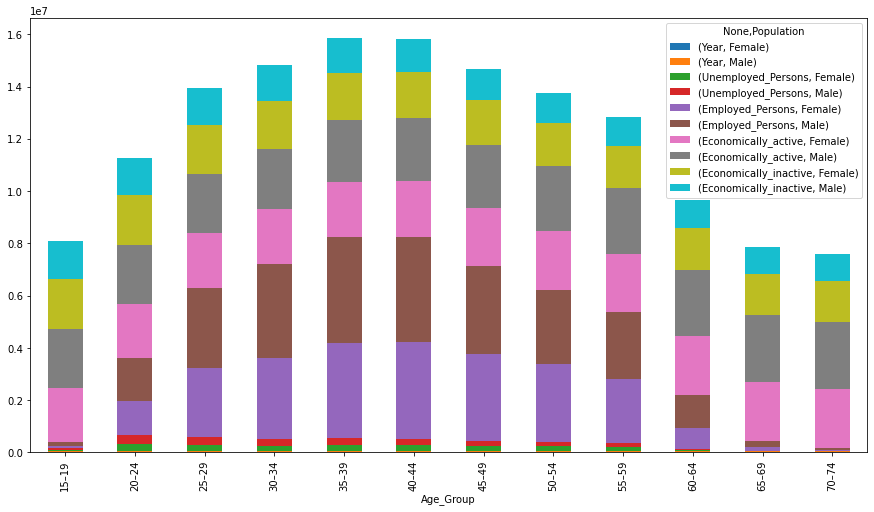

In [836]:
varld.unstack().plot(kind='bar', 
                   stacked=True, 
                   grid=False, 
                   figsize=(15,8))

Labour Market

Labour Market Overview

In [982]:
!head labourmarket.csv

ď»żAge_group,Population,Year,Employed,Employed_thousand,Unemployed,Unemployed_thousand,Economically_active,Economically_active_thousand,Economically_inactive,Economically_inactive_thousand,Population_aged_15â€“74,Population_aged_15â€“74_thousand,Of_which:_ Potential_labour_reserve,Of_which:_Potential_labour_reserve_thousand,Activity_rate,Unemployment_rate,Employment_rate
15â€“19,Male,2009,"7,257.55",7.26,"7,027.90",7.03,"14,285.46",14.29,"284,426.64",284.43,"298,712.09",298.71,"11,645.00",11.65,4.8,49.2,2.4
20â€“24,Male,2009,"115,730.22",115.73,"40,424.86",40.42,"156,155.08",156.16,"159,412.95",159.41,"315,568.03",315.57,"56,957.00",56.96,49.5,25.9,36.7
25â€“29,Male,2009,"262,217.09",262.22,"37,747.79",37.75,"299,964.89",299.96,"45,822.02",45.82,"345,786.90",345.79,"51,582.00",51.58,86.7,12.6,75.8
30â€“34,Male,2009,"332,099.18",332.1,"30,679.86",30.68,"362,779.04",362.78,"25,605.89",25.61,"388,384.93",388.38,"46,546.00",46.55,93.4,8.5,85.5
35â€“39,Male,2009,"321,046.60",321.05,"28,911.

In [983]:
dflabourmarket = pd.read_csv('labourmarket.csv')

In [984]:
dflabourmarket.head()

,Age_group,Population,Year,Employed,Employed_thousand,Unemployed,Unemployed_thousand,Economically_active,Economically_active_thousand,Economically_inactive,Economically_inactive_thousand,Population_aged_15–74,Population_aged_15–74_thousand,Of_which:_ Potential_labour_reserve,Of_which:_Potential_labour_reserve_thousand,Activity_rate,Unemployment_rate,Employment_rate
0,15–19,Male,2009,"7,257.55",7.26,"7,027.90",7.03,"14,285.46",14.29,"284,426.64",284.43,"298,712.09",298.71,"11,645.00",11.65,4.80,49.20,2.40
1,20–24,Male,2009,"115,730.22",115.73,"40,424.86",40.42,"156,155.08",156.16,"159,412.95",159.41,"315,568.03",315.57,"56,957.00",56.96,49.50,25.90,36.70
2,25–29,Male,2009,"262,217.09",262.22,"37,747.79",37.75,"299,964.89",299.96,"45,822.02",45.82,"345,786.90",345.79,"51,582.00",51.58,86.70,12.60,75.80
3,30–34,Male,2009,"332,099.18",332.10,"30,679.86",30.68,"362,779.04",362.78,"25,605.89",25.61,"388,384.93",388.38,"46,546.00",46.55,93.40,8.50,85.50
4,35–39,Male,2009,"321,046.60",321.05,"28,911.55",28.91,"349,958.15",349.96,"31,025.98",31.03,"380,984.13",380.98,"43,793.00",43.79,91.90,8.30,84.30


In [985]:
dflabourmarket.tail()

,Age_group,Population,Year,Employed,Employed_thousand,Unemployed,Unemployed_thousand,Economically_active,Economically_active_thousand,Economically_inactive,Economically_inactive_thousand,Population_aged_15–74,Population_aged_15–74_thousand,Of_which:_ Potential_labour_reserve,Of_which:_Potential_labour_reserve_thousand,Activity_rate,Unemployment_rate,Employment_rate
283,50–54,Female,2020,"283,454.00",283.45,"8,111.00",8.11,"291,565.00",291.57,"45,173.00",45.17,"336,737.00",336.74,"20,967.00",20.97,86.60,2.80,84.20
284,55–59,Female,2020,"206,772.00",206.77,"5,737.00",5.74,"212,509.00",212.51,"81,004.00",81.00,"293,514.00",293.51,"13,365.00",13.37,72.40,2.70,70.40
285,60–64,Female,2020,"106,255.00",106.26,"3,108.00",3.11,"109,363.00",109.36,"233,404.00",233.40,"342,767.00",342.77,"9,747.00",9.75,31.90,2.80,31.00
286,65–69,Female,2020,"29,594.00",29.59,593,0.59,"30,187.00",30.19,"336,634.00",336.63,"366,821.00",366.82,"3,904.00",3.90,8.20,2.00,8.10
287,70–74,Female,2020,"8,977.00",8.98,169,0.17,"9,146.00",9.15,"278,943.00",278.94,"288,089.00",288.09,"1,387.00",1.39,3.20,1.80,3.10


In [988]:
dflabourmarket.shape

(288, 18)

In [989]:
dflabourmarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Age_group                                    288 non-null    object 
 1   Population                                   288 non-null    object 
 2   Year                                         288 non-null    int64  
 3   Employed                                     288 non-null    object 
 4   Employed_thousand                            288 non-null    float64
 5   Unemployed                                   240 non-null    object 
 6   Unemployed_thousand                          240 non-null    float64
 7   Economically_active                          288 non-null    object 
 8   Economically_active_thousand                 288 non-null    float64
 9   Economically_inactive                        288 non-null    object 
 10  Ec

In [990]:
dflabourmarket.describe()

,Year,Employed_thousand,Unemployed_thousand,Economically_active_thousand,Economically_inactive_thousand,Population_aged_15–74_thousand,Of_which:_Potential_labour_reserve_thousand,Activity_rate,Unemployment_rate,Employment_rate
count,288.00,288.00,240.00,288.00,288.00,288.00,288.00,288.00,243.00,288.00
mean,2014.50,177.44,16.08,190.87,123.62,314.49,23.11,56.98,10.16,52.92
std,3.46,120.58,10.02,127.26,96.49,55.39,16.45,35.72,10.43,33.87
min,2009.00,1.88,0.17,1.91,12.36,159.28,0.13,0.70,1.80,0.70
25%,2011.75,32.99,8.09,34.40,42.89,285.26,9.61,11.33,3.80,10.75
50%,2014.50,217.38,13.89,234.29,73.00,310.33,20.34,77.20,7.40,70.35
75%,2017.25,275.79,24.02,293.46,218.02,352.63,38.87,87.03,9.89,82.58
max,2020.00,392.99,42.36,402.69,336.63,424.92,58.73,95.90,53.53,93.10


In [991]:
grouped = dflabourmarket.groupby('Year').mean() 
print(grouped)

      Employed_thousand  Unemployed_thousand  Economically_active_thousand  \
Year                                                                         
2009             162.27                23.01                        179.66   
2010             161.41                24.60                        180.95   
2011             162.62                23.26                        182.02   
2012             164.95                23.59                        184.65   
2013             167.89                21.97                        186.23   
2014             175.94                17.11                        190.23   
2015             180.63                15.34                        193.45   
2016             186.76                11.69                        196.53   
2017             189.52                 9.57                        197.50   
2018             191.93                 8.57                        199.09   
2019             193.52                 7.89                    

<AxesSubplot:xlabel='Year'>

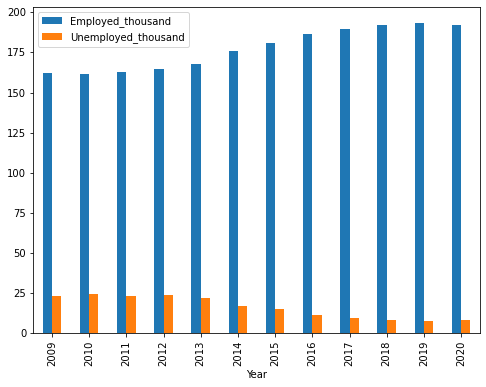

In [992]:
grouped[['Employed_thousand','Unemployed_thousand']].plot(kind='bar', figsize=(8,6))

<AxesSubplot:xlabel='Year'>

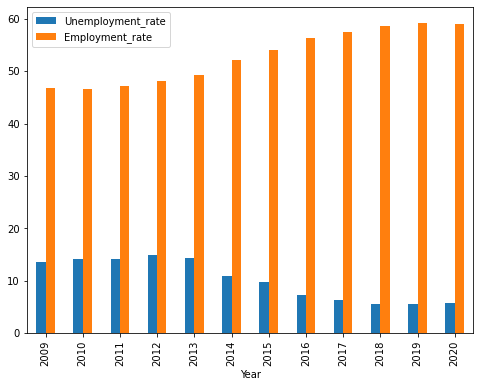

In [993]:
grouped[['Unemployment_rate', 'Employment_rate']].plot(kind='bar', figsize=(8,6))

<AxesSubplot:xlabel='Year'>

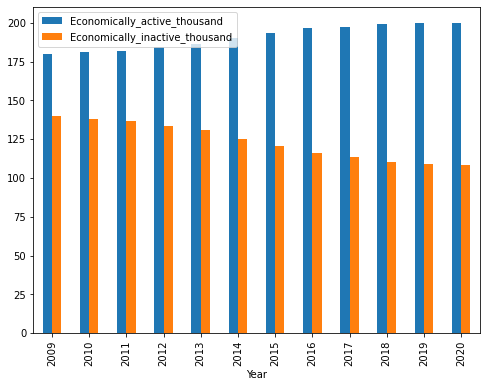

In [994]:
grouped[['Economically_active_thousand', 'Economically_inactive_thousand']].plot(kind='bar', figsize=(8,6))

In [995]:
var = dflabourmarket.groupby('Year').Unemployment_rate.mean()
print(var)

Year
2009   13.68
2010   14.18
2011   14.13
2012   14.99
2013   14.37
2014   10.89
2015    9.75
2016    7.33
2017    6.29
2018    5.59
2019    5.53
2020    5.87
Name: Unemployment_rate, dtype: float64


<AxesSubplot:xlabel='Year'>

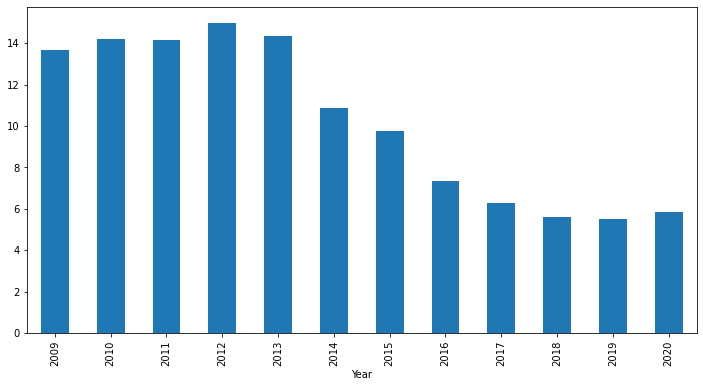

In [996]:
var.plot(kind='bar', figsize=(12,6))

<AxesSubplot:title={'center':'Changes in umemployment rate on the Hungarian labour market 2009-2020'}, xlabel='Year', ylabel='Unemployment Rate'>

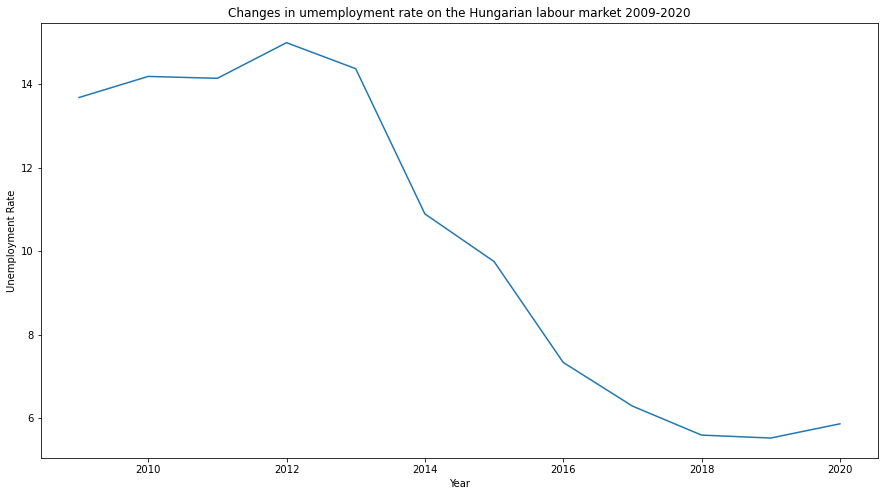

In [997]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,1,1)  
ax1.set_xlabel('Year')
ax1.set_ylabel('Unemployment Rate')
ax1.set_title("Changes in umemployment rate on the Hungarian labour market 2009-2020")

var.plot(ax=ax1, kind='line')

In [998]:
dflabourdata = pd.read_csv('labourdata.csv')

In [999]:
dflabourdata.head()

,Year,Population,Age_Group,Unemployed_Persons,Employed_Persons,Economically_active,Economically_inactive
0,2009,Male,15–19,7027.90,7257.60,14285.46,284426.64
1,2010,Male,15–19,6312.20,6369.80,156155.08,159412.95
2,2011,Male,15–19,5229.80,6934.00,299964.89,45822.02
3,2012,Male,15–19,7090.80,6156.80,362779.04,25605.89
4,2013,Male,15–19,8234.10,7823.90,349958.15,31025.98


In [1000]:
dflabourdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   288 non-null    int64  
 1   Population             288 non-null    object 
 2   Age_Group              288 non-null    object 
 3   Unemployed_Persons     240 non-null    float64
 4   Employed_Persons       288 non-null    float64
 5   Economically_active    288 non-null    float64
 6   Economically_inactive  288 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 15.9+ KB


In [1001]:
categorized = dflabourdata.groupby('Year').mean()
print(categorized)

      Unemployed_Persons  Employed_Persons  Economically_active  \
Year                                                              
2009            20853.81         162269.82             14494.23   
2010            23444.94         161407.62            147740.70   
2011            23259.90         162624.34            260044.35   
2012            23587.20         164946.84            297684.00   
2013            21970.39         167886.20            341270.87   
2014            17110.29         175941.64            341292.62   
2015            15339.06         180628.88            295323.71   
2016            11687.11         186758.69            257478.49   
2017             9567.72         189515.48            222177.89   
2018             8572.89         191932.49             90180.41   
2019             7892.60         193523.68             17130.76   
2020             9804.35         191801.29              5660.81   

      Economically_inactive  
Year                         
2

<AxesSubplot:xlabel='Year'>

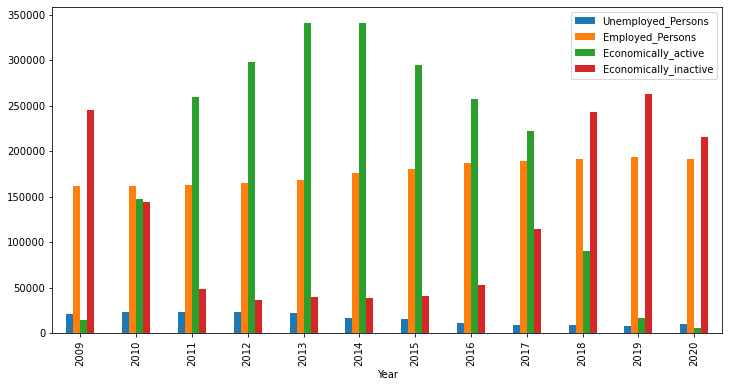

In [1002]:
categorized.plot(kind='bar', figsize=(12,6))

In [1003]:
# Update default settings to show 2 decimal place
pd.options.display.float_format = '{:.2f}'.format

# Createing a new dataframe with mediam
dfnewlabour = pd.DataFrame({'Year': ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
                   'Unemployed': ['28','31', '31', '31', '29', '23', '20', '16', '13', '11', '11', '13'],
                   'Employed': ['216', '215', '217', '220', '224', '235', '241', '249', '253', '256', '258', '256'],
                   'Unemployment_Rate': ['14', '14', '14', '15', '14', '11', '10', '7', '6', '6', '6', '6'],
                   'Employment_Rate': ['47', '47', '47', '48', '49', '52', '54', '56', '58', '59', '59', '59']})

In [1004]:
print(dfnewlabour)

    Year Unemployed Employed Unemployment_Rate Employment_Rate
0   2009         28      216                14              47
1   2010         31      215                14              47
2   2011         31      217                14              47
3   2012         31      220                15              48
4   2013         29      224                14              49
5   2014         23      235                11              52
6   2015         20      241                10              54
7   2016         16      249                 7              56
8   2017         13      253                 6              58
9   2018         11      256                 6              59
10  2019         11      258                 6              59
11  2020         13      256                 6              59


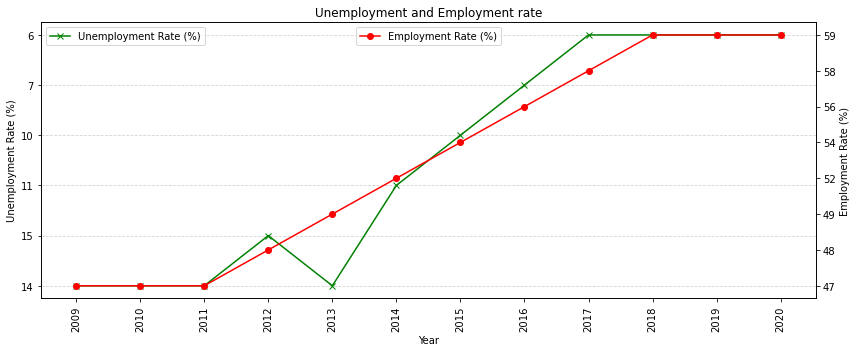

In [1005]:
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.set_title('Unemployment and Employment rate')
ax.set_xlabel('Year')
ax.plot(dfnewlabour['Year'], dfnewlabour['Unemployment_Rate'], color='green', marker='x')
ax2.plot(dfnewlabour['Year'], dfnewlabour['Employment_Rate'], color='red', marker='o')
ax.set_ylabel('Unemployment Rate (%)')
ax2.set_ylabel('Employment Rate (%)')
ax.legend(['Unemployment Rate (%)'])
ax2.legend(['Employment Rate (%)'], loc='upper center')
ax.set_xticks(dfnewlabour['Year'])
ax.set_xticklabels(dfnewlabour['Year'], rotation=90)
ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
plt.show()

In [1006]:
!head employmentrate.csv

ď»żUnit_name,Unit_type,Year,Employment_rate,Unemployment_rate,Activity Rate,Temporary in-migrants,Temporary out-migrants,Temporary migration difference,Temporary internal migrants,Permanent in-migrants,Permanent out-migrants,Permanent migration difference,Permanent internal migrants,Vacancies,Rate_of_vacancies
Budapest,"capital, region",2009,58.2,5.8,61.8,"28,182.00","17,541.00","10,641.00",NaN,"27,476.00","27,436.00",40,NaN,"9,782",1.1
Pest,"county, region",2009,55.1,6.8,59.2,"21,347.00","19,997.00","1,350.00","6,976.00","40,009.00","28,759.00","11,250.00","12,866.00","1,985",0.8
Central Hungary,large region,2009,57.0,6.2,60.7,"49,529.00","37,538.00","11,991.00","6,976.00","67,485.00","56,195.00","11,290.00","12,866.00","11,766",1.0
Fejer,county,2009,52.8,8.7,57.9,"8,032.00","8,137.00",-105,"3,763.00","10,123.00","10,041.00",82,"5,625.00",963,0.8
Komarom-Esztergom,county,2009,54.6,7.9,59.3,"5,404.00","5,473.00",-69,"2,555.00","6,457.00","6,624.00",-167,"3,859.00",707,0.9
Veszprem,coun

Employment and Unemployment rates

In [1007]:
dferates = pd.read_csv('employmentrate.csv')

In [1008]:
type(dferates)

pandas.core.frame.DataFrame

In [1009]:
dferates.head()

,Unit_name,Unit_type,Year,Employment_rate,Unemployment_rate,Activity Rate,Temporary in-migrants,Temporary out-migrants,Temporary migration difference,Temporary internal migrants,Permanent in-migrants,Permanent out-migrants,Permanent migration difference,Permanent internal migrants,Vacancies,Rate_of_vacancies
0,Budapest,"capital, region",2009,58.20,5.80,61.80,"28,182.00","17,541.00","10,641.00",NaN,"27,476.00","27,436.00",40,NaN,"9,782",1.10
1,Pest,"county, region",2009,55.10,6.80,59.20,"21,347.00","19,997.00","1,350.00","6,976.00","40,009.00","28,759.00","11,250.00","12,866.00","1,985",0.80
2,Central Hungary,large region,2009,57.00,6.20,60.70,"49,529.00","37,538.00","11,991.00","6,976.00","67,485.00","56,195.00","11,290.00","12,866.00","11,766",1.00
3,Fejer,county,2009,52.80,8.70,57.90,"8,032.00","8,137.00",-105,"3,763.00","10,123.00","10,041.00",82,"5,625.00",963,0.80
4,Komarom-Esztergom,county,2009,54.60,7.90,59.30,"5,404.00","5,473.00",-69,"2,555.00","6,457.00","6,624.00",-167,"3,859.00",707,0.90


In [1010]:
dferates.tail()

,Unit_name,Unit_type,Year,Employment_rate,Unemployment_rate,Activity Rate,Temporary in-migrants,Temporary out-migrants,Temporary migration difference,Temporary internal migrants,Permanent in-migrants,Permanent out-migrants,Permanent migration difference,Permanent internal migrants,Vacancies,Rate_of_vacancies
355,Bekes,county,2020,59.70,5.80,63.40,"9,190.00","9,574.00",-384,"4,704.00","7,112.00","8,179.00","-1,067.00","4,420.00","1,075",1.40
356,Csongrad-Csanad,county,2020,60.30,3.20,62.30,"11,442.00","11,482.00",-40,"5,781.00","9,087.00","9,295.00",-208,"5,780.00","1,223",1.20
357,Southern Great Plain,region,2020,60.50,4.50,63.40,"35,860.00","35,891.00",-31,"17,943.00","28,487.00","29,760.00","-1,273.00","17,311.00","3,858",1.30
358,Great Plain and North,large region,2020,58.90,5.60,62.50,"114,387.00","115,610.00","-1,223.00","60,264.00","95,312.00","104,060.00","-8,748.00","61,944.00","13,681",1.60
359,Total,country,2020,62.10,4.10,64.80,"301,613.00","301,613.00",NaN,"125,247.00","264,891.00","264,891.00",NaN,"135,264.00","60,669",2.00


In [1011]:
dferates.describe()

,Year,Employment_rate,Unemployment_rate,Activity Rate,Rate_of_vacancies
count,360.00,360.00,360.00,360.00,360.00
mean,2014.50,55.42,7.51,59.76,1.47
std,3.46,6.10,3.95,4.36,0.61
min,2009.00,40.50,1.10,49.10,0.50
25%,2011.75,51.15,4.20,56.48,1.00
50%,2014.50,55.90,7.25,60.00,1.30
75%,2017.25,60.10,10.10,63.23,1.90
max,2020.00,67.20,18.00,69.40,3.60


<AxesSubplot:>

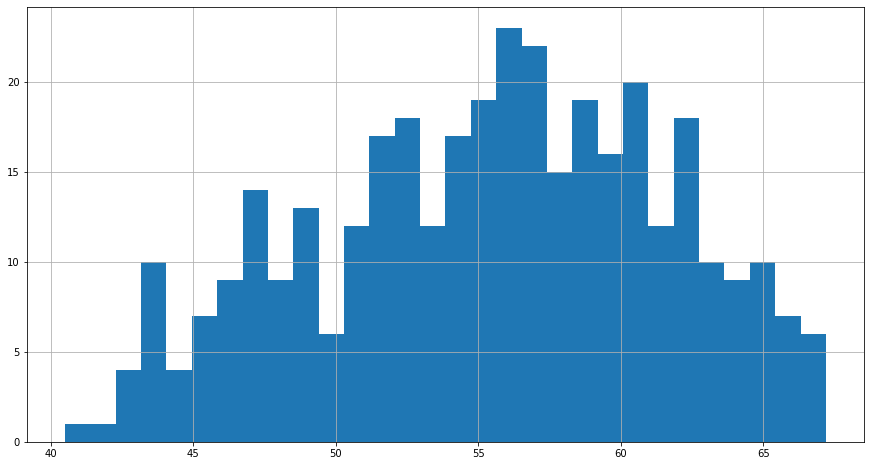

In [1012]:
dferates.Employment_rate.hist(figsize=(15,8), bins=30)

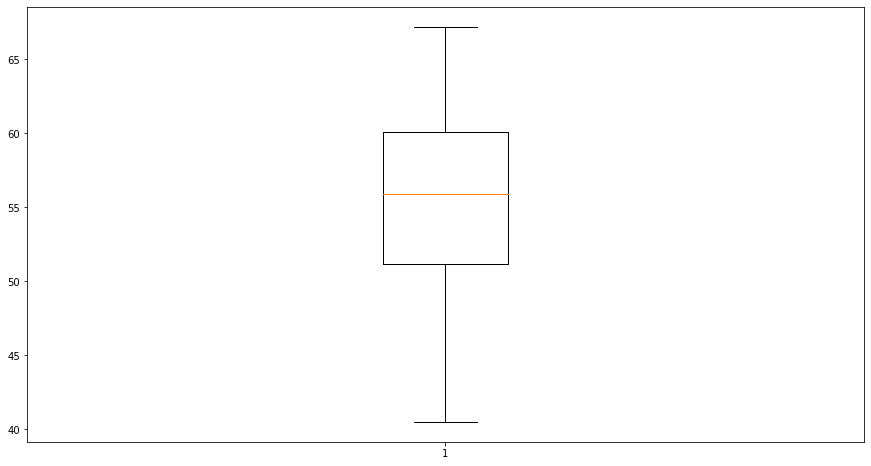

In [1013]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
ax.boxplot(dferates['Employment_rate'])
plt.show()

In [1017]:
dferatesyearly = pd.read_csv('erates_by_county_and_years.csv')

In [1018]:
dferatesyearly.head()

,County,Data,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Budapest,Unemployment_rate,5.80,8.60,9.20,9.20,8.00,5.80,4.90,4.20,2.80,3.00,2.30,3.20
1,Pest,Unemployment_rate,6.80,8.40,7.60,8.90,8.80,6.30,5.50,3.00,2.50,2.20,2.30,3.20
2,Central Hungary,Unemployment_rate,6.20,8.50,8.60,9.10,8.30,6.00,5.10,3.70,2.70,2.60,2.30,3.20
3,Fejér,Unemployment_rate,8.70,9.10,9.30,10.10,9.30,6.40,3.60,2.60,2.90,2.50,2.70,2.50
4,Komárom-Esztergom,Unemployment_rate,7.90,8.30,7.50,7.20,7.40,4.20,5.20,3.60,1.90,1.80,1.50,2.90


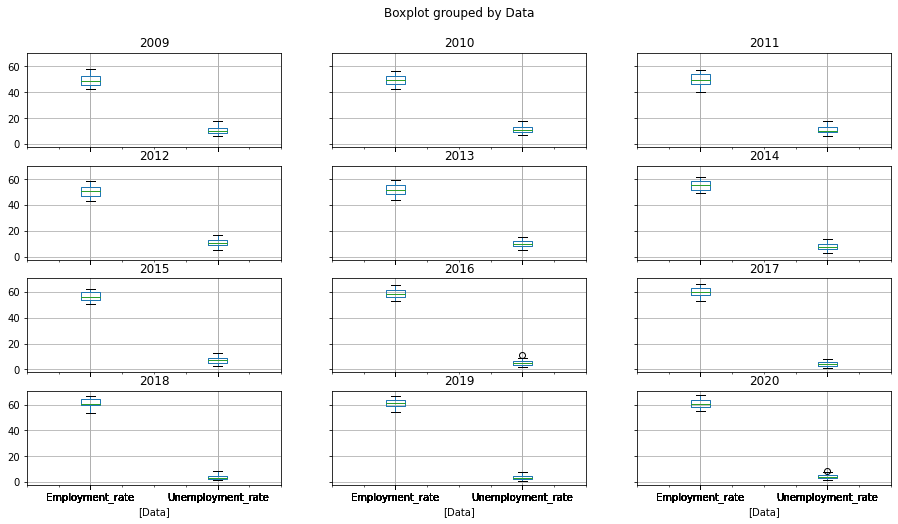

In [1019]:
dferatesyearly.boxplot(by='Data', figsize=(15,8));

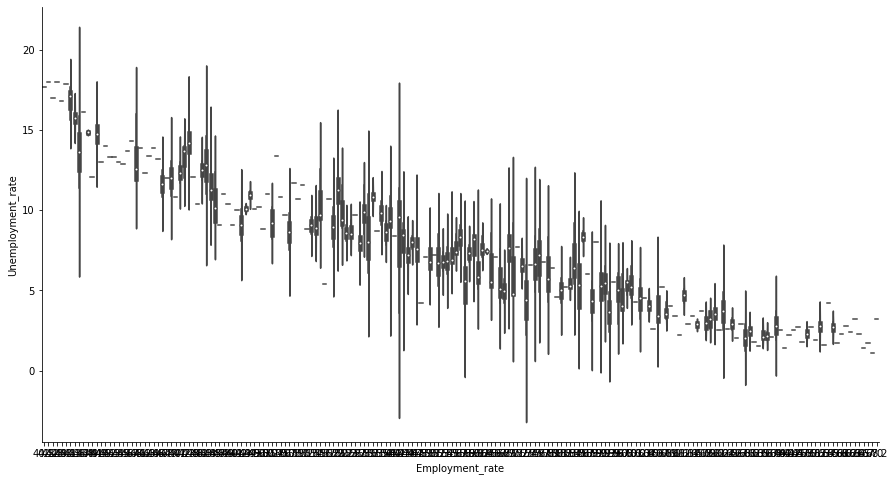

In [1020]:
fig = plt.figure(figsize=(15,8))

sns.violinplot(x=dferates['Employment_rate'], y=dferates['Unemployment_rate'])
sns.despine()

Migration

In [1041]:
dfvacancies = pd.read_csv('vacancies.csv')

In [1042]:
dfvacancies.head()

,Year,Segment,Category,Number of job vacancies,Job vacancies rate
0,2009,"Agriculture, forestry and fishing",A,293,0.40
1,2010,"Agriculture, forestry and fishing",A,260,0.30
2,2011,"Agriculture, forestry and fishing",A,214,0.30
3,2012,"Agriculture, forestry and fishing",A,419,0.50
4,2013,"Agriculture, forestry and fishing",A,248,0.30


In [1043]:
varvac = dfvacancies.groupby('Year').mean().stack()

varvac

Year                         
2009  Number of job vacancies   1218.89
      Job vacancies rate           0.84
2010  Number of job vacancies   1429.95
      Job vacancies rate           0.93
2011  Number of job vacancies   1511.95
      Job vacancies rate           0.94
2012  Number of job vacancies   1396.79
      Job vacancies rate           0.93
2013  Number of job vacancies   1726.53
      Job vacancies rate           1.09
2014  Number of job vacancies   1984.79
      Job vacancies rate           1.25
2015  Number of job vacancies   2344.95
      Job vacancies rate           1.32
2016  Number of job vacancies   2905.58
      Job vacancies rate           1.71
2017  Number of job vacancies   3586.16
      Job vacancies rate           1.91
2018  Number of job vacancies   4395.47
      Job vacancies rate           2.38
2019  Number of job vacancies   4142.74
      Job vacancies rate           2.23
2020  Number of job vacancies   3193.16
      Job vacancies rate           1.73
dtype: flo

In [1044]:
pie = varvac.unstack()
pie

,Number of job vacancies,Job vacancies rate
Year,,
2009,1218.89,0.84
2010,1429.95,0.93
2011,1511.95,0.94
2012,1396.79,0.93
2013,1726.53,1.09
2014,1984.79,1.25
2015,2344.95,1.32
2016,2905.58,1.71
2017,3586.16,1.91


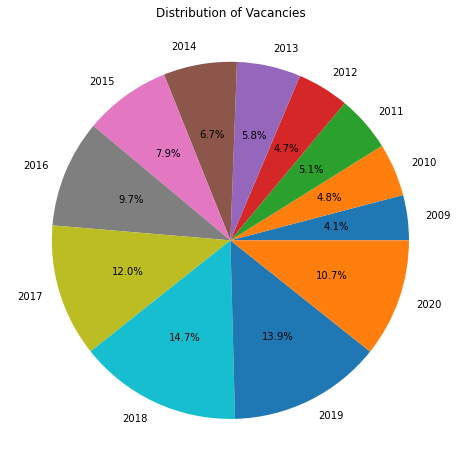

In [1046]:
x_list = pie['Number of job vacancies']
label_list = pie.index

fig = plt.figure(figsize=(8,8))
plt.axis("equal")

plt.pie(x_list,labels=label_list,autopct="%1.1f%%") 
plt.title("Distribution of Vacancies")
plt.show()

In [1049]:
dfreg = pd.read_csv('regional.csv')
dfreg.head()

,Unit_name,Unit_type,Region,Year,Employment_rate,Unemployment_rate,Activity_Rate,Temporary_in_migrants,Temporary_out_migrants,Temporary_migraton_difference,...,Permanent_out_migrants,Permanent_migration_difference,Permanent_internal_migrants,Vacancies,Rate_of_vacancies,"Economically_active,_thousand_persons","Economically_inactive,_thousand_persons",Population_aged_15–74_thousand_persons,Of_which_Potential_labour_reserve_thousand_persons,Unnamed: 21
0,Budapest,capital,Regio_1,2009,58.20,5.80,61.80,28182.00,17541.00,10641.00,...,27436.00,40.00,NaN,9782.00,1.10,813.20,502.60,1315.80,76.20,NaN
1,Pest,county,Regio_2,2009,55.10,6.80,59.20,21347.00,19997.00,1350.00,...,28759.00,11250.00,12866.00,1985.00,0.80,541.70,373.40,915.00,58.40,NaN
2,Fejer,county,Regio_3,2009,52.80,8.70,57.90,8032.00,8137.00,-105.00,...,10041.00,82.00,5625.00,963.00,0.80,190.50,138.70,329.20,24.30,NaN
3,Komarom-Esztergom,county,Regio_3,2009,54.60,7.90,59.30,5404.00,5473.00,-69.00,...,6624.00,-167.00,3859.00,707.00,0.90,142.90,98.00,240.80,18.00,NaN
4,Veszprem,county,Regio_3,2009,51.60,9.70,57.20,7326.00,7714.00,-388.00,...,8432.00,-232.00,5111.00,467.00,0.60,159.20,119.30,278.50,21.70,NaN


In [1051]:
dfreg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 22 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Unit_name                                           240 non-null    object 
 1   Unit_type                                           240 non-null    object 
 2   Region                                              240 non-null    object 
 3   Year                                                240 non-null    int64  
 4   Employment_rate                                     240 non-null    float64
 5   Unemployment_rate                                   240 non-null    float64
 6   Activity_Rate                                       240 non-null    float64
 7   Temporary_in_migrants                               240 non-null    float64
 8   Temporary_out_migrants                              240 non-null    float64
 9  

In [1075]:
dfreg['Unit_type'] = dfreg['Unit_type'].astype('category')
dfreg['Region'] = dfreg['Region'].astype('category')
dfreg['Year'] = dfreg['Year'].astype('category')

In [1076]:
dfreg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 22 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   Unit_name                                           240 non-null    object  
 1   Unit_type                                           240 non-null    category
 2   Region                                              240 non-null    category
 3   Year                                                240 non-null    category
 4   Employment_rate                                     240 non-null    float64 
 5   Unemployment_rate                                   240 non-null    float64 
 6   Activity_Rate                                       240 non-null    float64 
 7   Temporary_in_migrants                               240 non-null    float64 
 8   Temporary_out_migrants                              240 non-null    fl

In [1055]:
dfreg['Unit_type'].unique()

['capital', 'county']
Categories (2, object): ['capital', 'county']

In [1056]:
dfreg['Unit_type'].value_counts()

county     228
capital     12
Name: Unit_type, dtype: int64

In [1057]:
dfreg['Region'].unique()

['Regio_1', 'Regio_2', 'Regio_3', 'Regio_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8']
Categories (8, object): ['Regio_1', 'Regio_2', 'Regio_3', 'Regio_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8']

In [1058]:
dfreg['Region'].value_counts()

Regio_3     36
Regio_4     36
Region_5    36
Region_6    36
Region_7    36
Region_8    36
Regio_1     12
Regio_2     12
Name: Region, dtype: int64

In [1059]:
dfreg.describe()

,Year,Employment_rate,Unemployment_rate,Activity_Rate,Temporary_in_migrants,Temporary_out_migrants,Temporary_migraton_difference,Temporary_internal_migrants,Permanent_in_migrants,Permanent_out_migrants,Permanent_migration_difference,Permanent_internal_migrants,Vacancies,Rate_of_vacancies,"Economically_active,_thousand_persons","Economically_inactive,_thousand_persons",Population_aged_15–74_thousand_persons,Of_which_Potential_labour_reserve_thousand_persons,Unnamed: 21
count,240.00,240.00,240.00,240.00,240.00,240.00,240.00,228.00,240.00,240.00,240.00,228.00,240.00,240.00,240.00,240.00,240.00,240.00,0.00
mean,2014.50,55.35,7.52,59.69,13349.45,13349.45,0.00,6006.93,11589.51,11589.51,0.00,6197.72,2362.03,1.46,229.05,148.34,377.38,27.73,NaN
std,3.46,6.22,4.07,4.47,8973.44,8405.38,1632.49,2647.56,9173.94,7673.10,2762.87,3090.37,4379.51,0.63,180.73,96.00,274.02,21.01,NaN
min,2009.00,40.50,1.10,49.10,3039.00,3901.00,-7761.00,1688.00,3616.00,4147.00,-8635.00,2285.00,195.00,0.50,77.40,52.00,143.50,4.00,NaN
25%,2011.75,50.88,4.20,56.27,8212.25,8414.00,-580.00,4238.50,6849.50,7248.00,-824.75,4251.50,766.00,1.00,132.80,91.70,230.47,12.75,NaN
50%,2014.50,55.90,7.25,59.95,10890.00,11331.50,-227.50,5353.50,9036.50,9262.00,-346.00,5472.00,1206.00,1.30,169.45,116.05,286.90,21.75,NaN
75%,2017.25,60.12,10.12,63.23,14741.50,14561.25,189.25,7177.50,11603.50,12430.75,101.25,7167.75,1999.00,1.90,236.72,153.77,402.50,34.80,NaN
max,2020.00,67.20,18.00,69.40,44129.00,48201.00,12617.00,14191.00,56828.00,41889.00,14939.00,19505.00,32740.00,3.60,908.30,502.60,1335.20,118.50,NaN


C:\Users\N\anaconda3_64bit\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


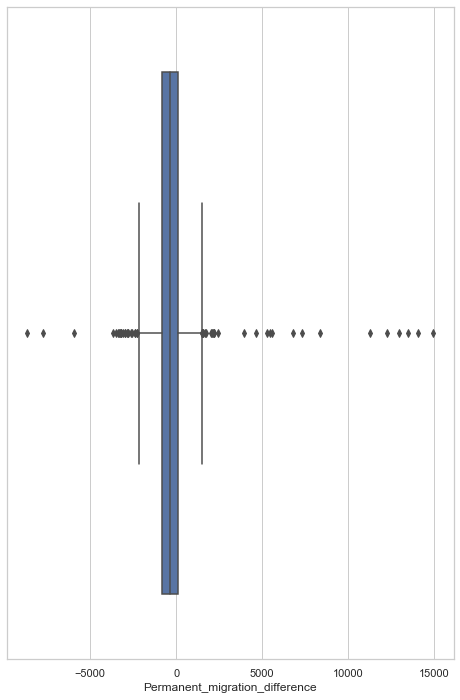

In [1065]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,12))
ax = sns.boxplot(x='Permanent_migration_difference', data=dfreg, orient="v")

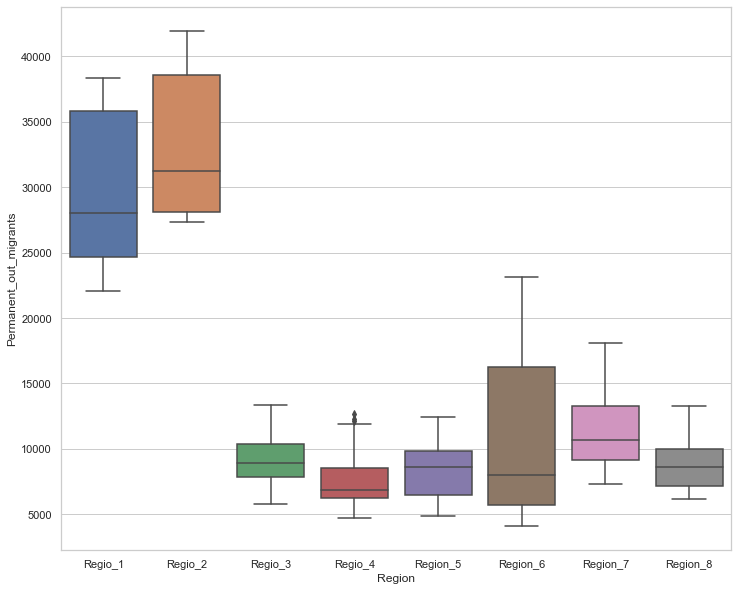

In [1068]:
plt.figure(figsize=(12,10))
ax = sns.boxplot(x='Region', y='Permanent_out_migrants', data=dfreg, orient="v")

<AxesSubplot:xlabel='Rate_of_vacancies', ylabel='Count'>

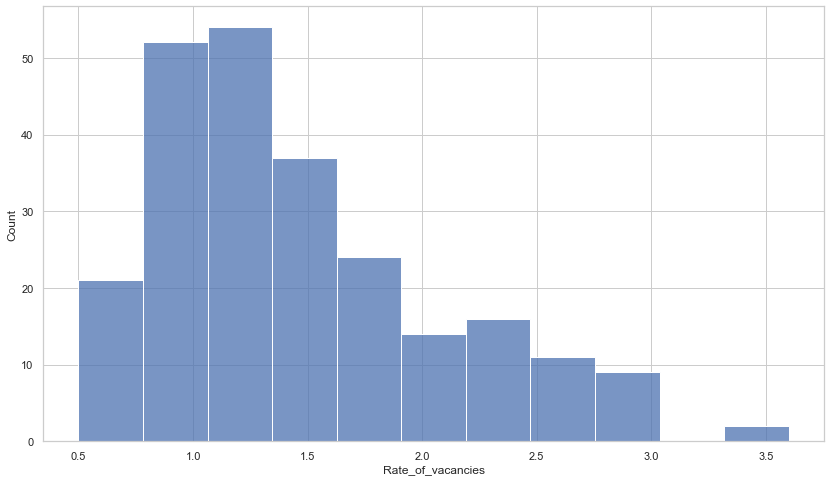

In [1072]:
filter_data = dfreg.dropna(subset=['Rate_of_vacancies'])
plt.figure(figsize=(14,8))

sns.histplot(filter_data['Rate_of_vacancies'], kde=False)

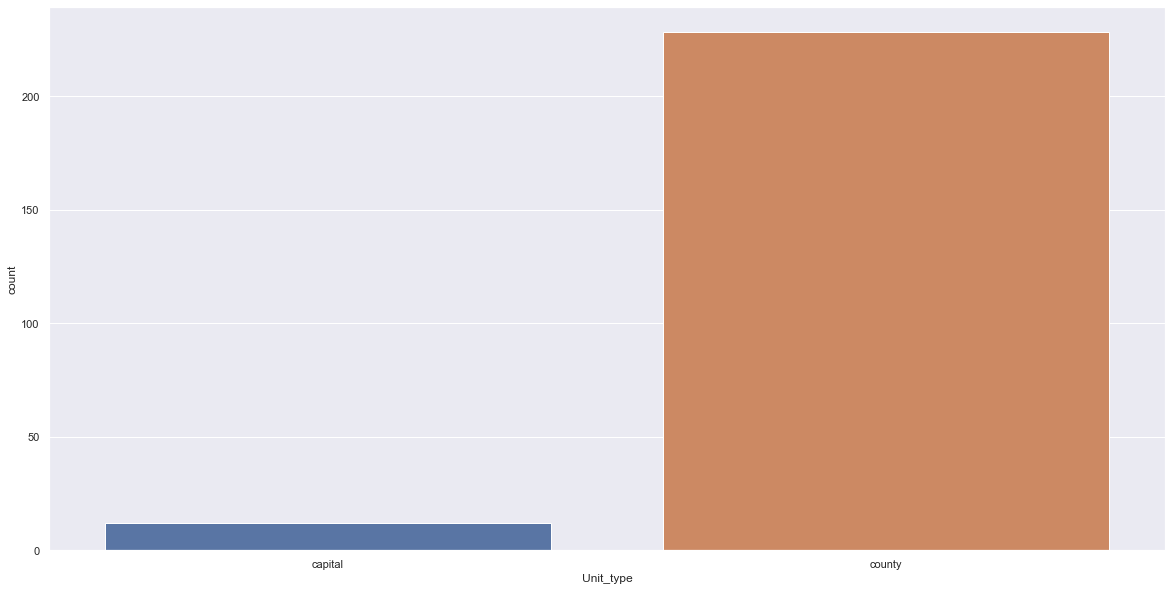

In [1080]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))

hist = sns.countplot(x='Unit_type', data=dfreg)

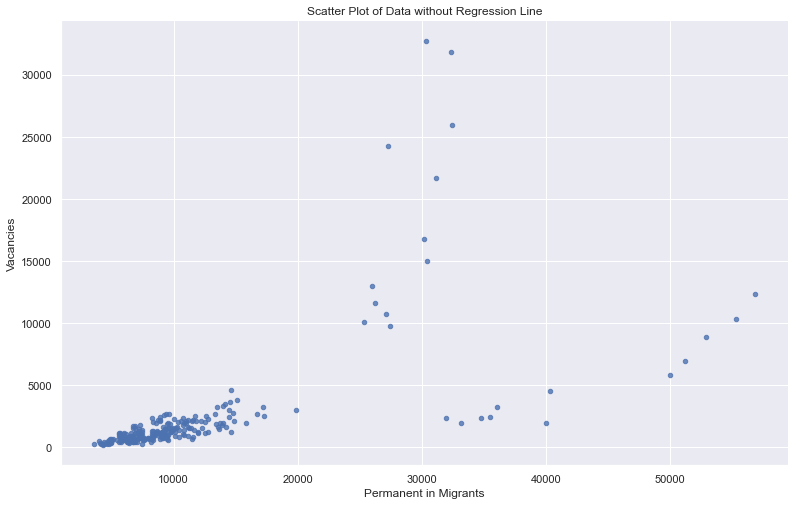

In [1089]:
sns.lmplot(x='Permanent_in_migrants', 
           y='Vacancies', 
           data=dfreg, 
           fit_reg=False, 
           scatter_kws={"marker": "D", "s": 20}, 
           height=7, 
           aspect=1.6) 
plt.title('Scatter Plot of Data without Regression Line')
plt.xlabel('Permanent in Migrants')
plt.ylabel('Vacancies')
plt.show()

In [1098]:
dfreglim.head()

,Year,Name,Unit,No,Regional_unit,Male Population,Female Population,Total Population,Population 0-14 year-old,Population 15-64 year-old,...,Of which: Potential labour reserve persons,"Unemployment rate, %","Employment rate, %",Vacancies,Vacancy Rate,"Average gross earningsof full-time employees by location of the employers head office, HUF",Corresponding period of the previous year = 100.0%,"Average net earnings, HUF",Corresponding period of the previous year = 100.0%.1,Activity rate by counties and regions [%]
0,2018,Budapest,capital,11,capital,814293,935441,1749734,236591,1161897,...,46500,3.00,65.60,31862,2.90,413944,110.40,275273,110.40,67.70
1,2018,Pest county,county,1,region_1,609459,652405,1261864,211624,838010,...,26200,2.20,64.20,12367,3.60,298755,110.80,198673,110.80,65.60
2,2018,Fejer county,county,2,region_2,201812,214879,416691,60574,279871,...,9300,2.50,64.00,4629,3.50,321633,112.20,213885,112.20,65.70
3,2018,Komarom-Esztergom county,county,2,region_2,142726,154728,297454,43600,199417,...,7400,1.80,64.80,2672,2.90,323812,111.20,215336,111.20,65.90
4,2018,Veszprem county,county,2,region_2,164961,176464,341425,47646,226615,...,5300,2.00,62.70,2219,2.40,297585,113.20,197894,113.20,63.90


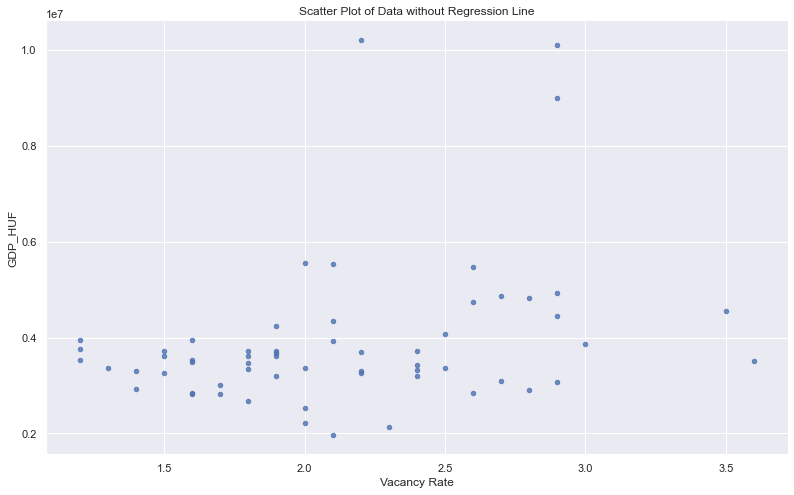

In [1102]:
sns.lmplot(x='Vacancy Rate', 
           y='GDP_HUF', 
           data=dfreglim, 
           fit_reg=False, 
           scatter_kws={"marker": "D", "s": 20}, 
           height=7, 
           aspect=1.6) 
plt.title('Scatter Plot of Data without Regression Line')
plt.xlabel('Vacancy Rate')
plt.ylabel('GDP_HUF')
plt.show()

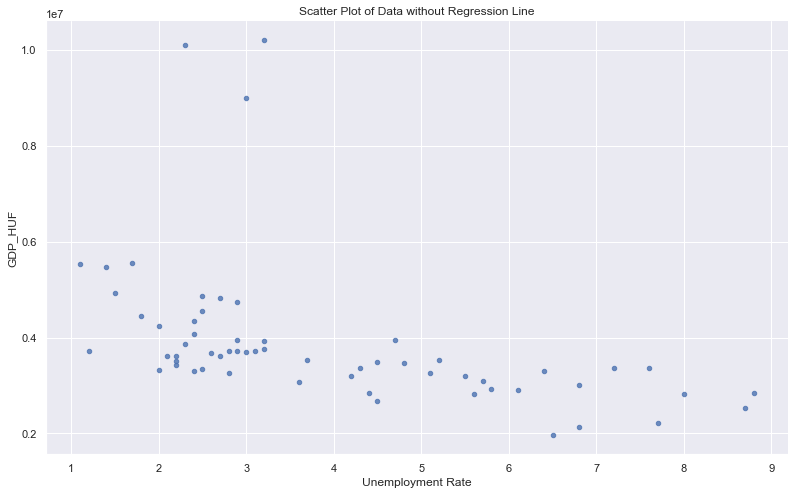

In [1103]:
sns.lmplot(x='Unemployment rate, %', 
           y='GDP_HUF', 
           data=dfreglim, 
           fit_reg=False, 
           scatter_kws={"marker": "D", "s": 20}, 
           height=7, 
           aspect=1.6) 
plt.title('Scatter Plot of Data without Regression Line')
plt.xlabel('Unemployment Rate')
plt.ylabel('GDP_HUF')
plt.show()

## References

## Data Source

https://www.ksh.hu/